In [29]:

#Python opencv package
import cv2
import numpy as np
%matplotlib inline
#import plot packages from matplotlib
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from skimage.util import random_noise



In [15]:
im = cv2.imread('download (6).jpg',1)

In [16]:
im

array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[20, 22, 22],
        [16, 18, 18],
        [30, 32, 32],
        ...,
        [ 5,  8,  6],
        [19, 22, 20],
        [35, 38, 36]],

       [[16, 18, 18],
        [ 9, 11, 11],
        [20, 22, 22],
        ...,
        [ 4,  7,  5],
        [ 4,  7,  5],
        [ 4,  7,  5]],

       [[16, 18, 18],
        [ 9, 11, 11],
        [20, 22, 22],
        ...,
        [10, 13, 11],
        [10, 13, 11],
        [10, 13, 11]]], dtype=uint8)

In [17]:
im.shape

(194, 259, 3)

In [19]:
 np.max(im),np.min(im)

(240, 0)

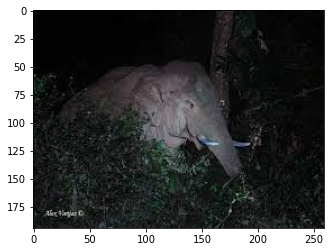

In [20]:
plt.imshow(im)

(array([8.6792e+04, 3.7279e+04, 1.2403e+04, 6.4830e+03, 4.8320e+03,
        2.4580e+03, 3.8900e+02, 6.8000e+01, 3.0000e+01, 4.0000e+00]),
 array([  0.,  24.,  48.,  72.,  96., 120., 144., 168., 192., 216., 240.]),
 <BarContainer object of 10 artists>)

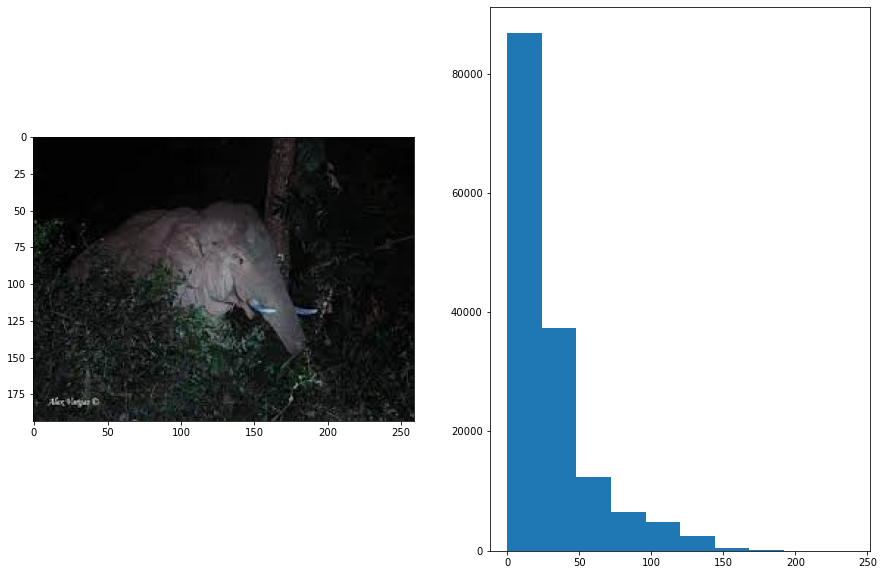

In [21]:
#plotting histogram
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt. imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.hist(im.ravel())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


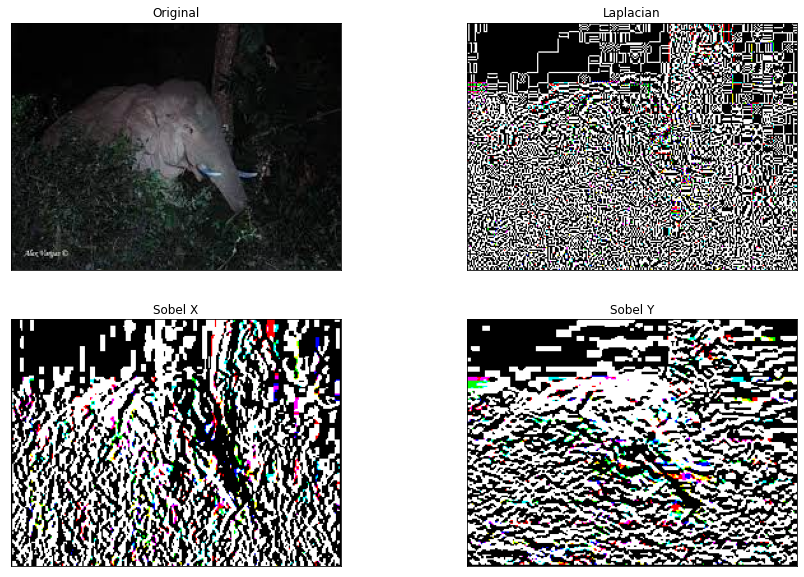

In [22]:
laplacian = cv2.Laplacian(im,cv2.CV_64F)
sobelx = cv2.Sobel(im,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(im,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1),plt.imshow(im,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

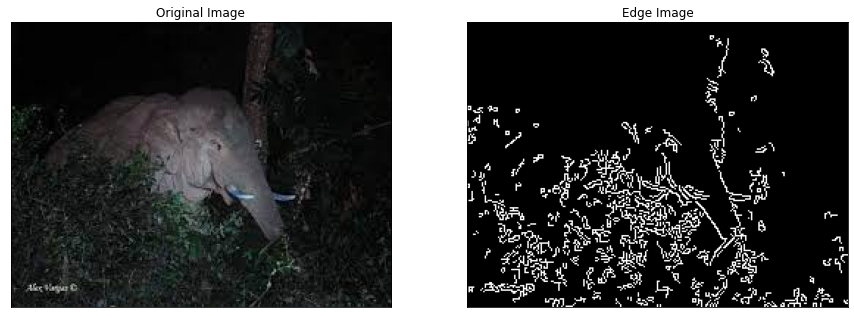

In [23]:
#edges
edges = cv2.Canny(im,100,200)
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(im,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

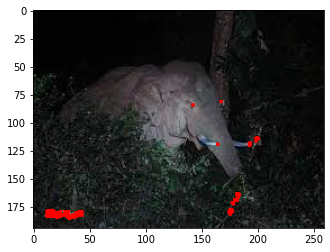

In [24]:
#harris corner #for the internal corners
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.004)

dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
im[dst>0.1*dst.max()]=[255,0,0]

plt.imshow(im)

In [27]:
hog = cv2.HOGDescriptor()
h = hog.compute(im)
h

array([[0.39285195],
       [0.00353548],
       [0.01057947],
       ...,
       [0.22682492],
       [0.22521828],
       [0.18276829]], dtype=float32)

In [28]:
h.shape

(850500, 1)

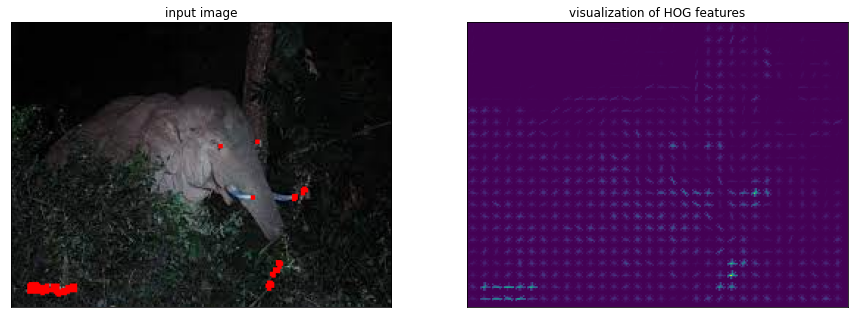

In [31]:
from skimage import data, color, feature
import skimage.data

hog_vec, hog_vis = feature.hog(im, visualize=True)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(im)
plt.xticks([]), plt.yticks([])
plt.title('input image')
plt.subplot(1,2,2)
plt.imshow(hog_vis)
plt.xticks([]), plt.yticks([])
plt.title('visualization of HOG features');